# Cleaning Script for races.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
X = pd.read_csv("../data/race.csv")
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   race_year_id    1207 non-null   int64  
 1   event           1207 non-null   object 
 2   race            1207 non-null   object 
 3   city            1035 non-null   object 
 4   country         1203 non-null   object 
 5   date            1207 non-null   object 
 6   start_time      1207 non-null   object 
 7   participation   1207 non-null   object 
 8   distance        1207 non-null   float64
 9   elevation_gain  1207 non-null   int64  
 10  elevation_loss  1207 non-null   int64  
 11  aid_stations    1207 non-null   int64  
 12  participants    1207 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 122.7+ KB


- race_year_id ✅
- event ✅
- race ✅
- city ✅
- country ✅
- date ✅
- country ✅
- start_time ✅

### Cleaning participation typo
'Solo' and 'solo' both in the participation field. Transformed 'Solo' to 'solo'.

In [3]:
mask = X.participation == "Solo"
X.loc[mask, "participation"] = "solo"
X.participation.unique()

array(['solo', 'team', 'relay'], dtype=object)

### Cleaning city typo
One city called '???' renamed to 'nan'.

In [4]:
X[X.city == '???'] = np.nan

### Cleaning atypical distance values

In the dataset several distance variables were null (74 to be exact). In most cases, the positive and negative slope values were also zero. Most of our explorations and applications will focus on these quantitative variables. We therefore eliminate them from the dataset.

In [13]:
X = X.loc[X.distance != 0]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 1206
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   race_year_id    1133 non-null   int64  
 1   event           1133 non-null   object 
 2   race            1133 non-null   object 
 3   city            984 non-null    object 
 4   country         1129 non-null   object 
 5   date            1133 non-null   object 
 6   start_time      1133 non-null   object 
 7   participation   1133 non-null   object 
 8   distance        1133 non-null   float64
 9   elevation_gain  1133 non-null   int64  
 10  elevation_loss  1133 non-null   int64  
 11  aid_stations    1133 non-null   int64  
 12  participants    1133 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 123.9+ KB


<u>note:</u> the data set becomes narrower but very relatively.

#### What about "short" distances?

We quickly notice that some races have atypically short distances. In the case of our study, it could be useful to treat them separately in order to compare more general results found on "normal" individuals.<br>
Only 7 races are less than 150km, eventhough the definition says we talk about "ultra trails" when it's longer than a marathon (42 km).

In [6]:
X_short = X.loc[X.distance <= 140]
X_short
X = X.loc[X.distance > 140]

<AxesSubplot:xlabel='distance', ylabel='Count'>

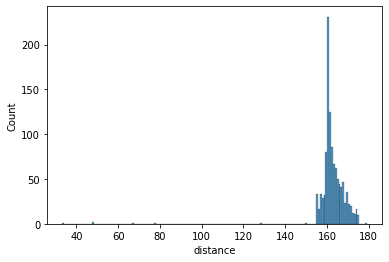

In [14]:
sns.histplot(X.distance)

### Elevation gain and loss

At first sight there's not atypical data to be declared. ✅

### Aid stations

All clear ✅

### Participants

Almost half of the races have no participants. We can't do much about it, the rest of the data on these races is still intersting.

<AxesSubplot:xlabel='participants'>

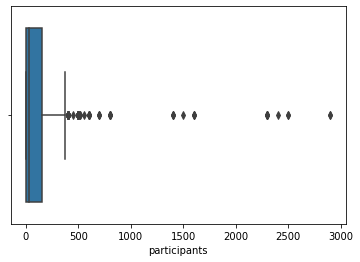

In [8]:
sns.boxplot(
    x = "participants",
    data = X
)

<AxesSubplot:xlabel='participants'>

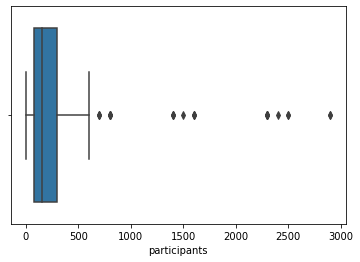

In [9]:
sns.boxplot(
    x = "participants",
    data = X[X.participants != 0]
)

## Save new data frame to CSV

Created file directly goes to the output folder.

In [10]:
from pathlib import Path  

filepath = Path('../output/out.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

X.to_csv(filepath)  